# 🛡️ Cybersecurity Attack & Defence Analysis

**Dataset source:** [Kaggle - Cybersecurity Attack and Defence Dataset](https://www.kaggle.com/datasets/tannubarot/cybersecurity-attack-and-defence-dataset)  
**Author of dataset:** Tannu Barot

## 📄 Description

This dataset provides a comprehensive and user-friendly collection of cybersecurity events, including various types of attacks and legitimate network traffic. Each row represents an individual event or packet, with features such as:

- Timestamp
- Source and destination IP addresses
- Port numbers and protocols
- Packet size
- Attack type (label)
- Possible defense-related indicators

## 🎯 Project Purpose

This notebook is part of my data science portfolio. The goal is to analyze cyberattack behavior using data visualization and machine learning techniques. Specifically, we aim to:

- Understand the distribution of different types of attacks.
- Identify network patterns associated with malicious activity.
- Train a classifier to distinguish between normal and attack traffic.

## 🧱 Dataset Structure

- Format: CSV (~6 MB)
- Thousands of rows and multiple columns including network metadata and labeled traffic.
- Suitable for supervised learning tasks.

## 🔄 Typical Workflow

1. Load and explore the data.
2. Clean and preprocess: handle missing values, encode categorical variables.
3. Visualize key patterns in network traffic and attack behavior.
4. Train a classification model (e.g., Random Forest).
5. Evaluate model performance using accuracy, precision, recall, F1-score.
6. (Optional) Simulate defense scenarios or explore feature importance.

---

> 🧑‍💻 This notebook is created by **Luis Enrique Riquelme Cajica** as a data science portfolio project. All code and results are for educational purposes.


### 1. Importacion de librerias / Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use("ggplot")
sns.set_theme(style="whitegrid")

### 2.Load Dataset / Cargar el Dataset

In [20]:
df = pd.read_csv('dataset/Attack_Dataset.csv')
df.head()

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source,Unnamed: 15
0,1,Authentication Bypass via SQL Injection,Mobile Security,SQL Injection (SQLi),A login form fails to validate or sanitize inp...,"Browser, Burp Suite, SQLMap",1. Reconnaissance: Find a login form on the we...,"Web Login Portals (e.g., banking, admin dashbo...",Unsanitized input fields in SQL queries,"T1078 (Valid Accounts), T1190 (Exploit Public-...","Full account takeover, data theft, privilege e...","Web server logs, anomaly detection (e.g., logi...","Use prepared statements, Sanitize inputs, Limi...","SQLi, Authentication Bypass, Web Security, OWA...","OWASP, MITRE ATT&CK, DVWA",NaN
1,2,Union-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when a hacker uses the SQL ...,"SQLMap, Burp Suite, Havij, Browser Developer T...",1. Identify User Input Points: Attacker finds ...,"Web Applications, Login Pages, Search Forms",Improperly filtered input fields that allow SQ...,T1190 – Exploit Public-Facing Application,"Data leakage, Credential theft, Account takeov...",Web Application Firewalls (WAF)Log AnalysisInp...,Use parameterized queries (Prepared Statements...,#SQLInjection #WebSecurity #UnionAttack #OWASP...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web...",NaN
2,3,Error-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when an attacker intentiona...,"SQLMap, Burp Suite, Manual Browser Testing, Havij",1. Identify Input Points:Attacker finds a fiel...,"Web Applications, Login Forms, URL Parameters,...",Error message exposure due to lack of input va...,T1190 – Exploit Public-Facing Application,"Information disclosure, Database structure exp...",Review and monitor error logsEnable generic er...,Turn off detailed error messages in production...,#SQLInjection #ErrorLeakage #WebAppSecurity #O...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web...",NaN
3,4,Blind SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In Blind SQL Injection, the attacker doesn’t s...","SQLMap, Burp Suite, sqlninja, Manual Browser T...",1. Find a User Input Point:Attacker finds a pl...,"Web Applications, Login Pages, Search Fields, ...","No error messages, but user input is still pas...",T1190 – Exploit Public-Facing Application,Slow and stealthy data theftFull database comp...,Monitor for slow and repetitive requestsAnalyz...,Use parameterized queries (prepared statements...,#BlindSQLi #TimeBasedSQLi #WebAppSecurity #OWA...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger, SQ...",NaN
4,5,Second-Order SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In a Second-Order SQL Injection, the attacker ...","Burp Suite, SQLMap, Postman, Browser Dev Tools...",1. Identify Stored Input Fields:The attacker l...,"Web Applications, User Registration Forms, Pro...",Trusting previously stored unvalidated data in...,T1505.003 – SQL Injection,Delayed data theftUnexpected system behaviorSe...,Log monitoring for delayed query failuresTrack...,Sanitize and validate inputs both at entry and...,#SecondOrderSQLi #DelayedInjection #StoredInje...,"OWASP, MITRE ATT&CK, PortSwigger Academy, Acun...",NaN


### 3. Data Cleaning / Limpieza de Datos

In [9]:
print("Shape:", df.shape)

Shape: (14133, 16)


In [10]:
print("Missing values:", df.isnull().sum())

Missing values: ID                          0
Title                       0
Category                    0
Attack Type                 0
Scenario Description        0
Tools Used                 14
Attack Steps                0
Target Type                 4
Vulnerability              18
MITRE Technique            24
Impact                      3
Detection Method            4
Solution                    3
Tags                        3
Source                    160
Unnamed: 15             14087
dtype: int64


In [11]:
print("Data types:", df.dtypes)

Data types: ID                       int64
Title                   object
Category                object
Attack Type             object
Scenario Description    object
Tools Used              object
Attack Steps            object
Target Type             object
Vulnerability           object
MITRE Technique         object
Impact                  object
Detection Method        object
Solution                object
Tags                    object
Source                  object
Unnamed: 15             object
dtype: object


In [21]:
df = df.drop('Unnamed: 15', axis=1)  # Drop unnecessary column
df.head()

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source
0,1,Authentication Bypass via SQL Injection,Mobile Security,SQL Injection (SQLi),A login form fails to validate or sanitize inp...,"Browser, Burp Suite, SQLMap",1. Reconnaissance: Find a login form on the we...,"Web Login Portals (e.g., banking, admin dashbo...",Unsanitized input fields in SQL queries,"T1078 (Valid Accounts), T1190 (Exploit Public-...","Full account takeover, data theft, privilege e...","Web server logs, anomaly detection (e.g., logi...","Use prepared statements, Sanitize inputs, Limi...","SQLi, Authentication Bypass, Web Security, OWA...","OWASP, MITRE ATT&CK, DVWA"
1,2,Union-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when a hacker uses the SQL ...,"SQLMap, Burp Suite, Havij, Browser Developer T...",1. Identify User Input Points: Attacker finds ...,"Web Applications, Login Pages, Search Forms",Improperly filtered input fields that allow SQ...,T1190 – Exploit Public-Facing Application,"Data leakage, Credential theft, Account takeov...",Web Application Firewalls (WAF)Log AnalysisInp...,Use parameterized queries (Prepared Statements...,#SQLInjection #WebSecurity #UnionAttack #OWASP...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web..."
2,3,Error-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when an attacker intentiona...,"SQLMap, Burp Suite, Manual Browser Testing, Havij",1. Identify Input Points:Attacker finds a fiel...,"Web Applications, Login Forms, URL Parameters,...",Error message exposure due to lack of input va...,T1190 – Exploit Public-Facing Application,"Information disclosure, Database structure exp...",Review and monitor error logsEnable generic er...,Turn off detailed error messages in production...,#SQLInjection #ErrorLeakage #WebAppSecurity #O...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web..."
3,4,Blind SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In Blind SQL Injection, the attacker doesn’t s...","SQLMap, Burp Suite, sqlninja, Manual Browser T...",1. Find a User Input Point:Attacker finds a pl...,"Web Applications, Login Pages, Search Fields, ...","No error messages, but user input is still pas...",T1190 – Exploit Public-Facing Application,Slow and stealthy data theftFull database comp...,Monitor for slow and repetitive requestsAnalyz...,Use parameterized queries (prepared statements...,#BlindSQLi #TimeBasedSQLi #WebAppSecurity #OWA...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger, SQ..."
4,5,Second-Order SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In a Second-Order SQL Injection, the attacker ...","Burp Suite, SQLMap, Postman, Browser Dev Tools...",1. Identify Stored Input Fields:The attacker l...,"Web Applications, User Registration Forms, Pro...",Trusting previously stored unvalidated data in...,T1505.003 – SQL Injection,Delayed data theftUnexpected system behaviorSe...,Log monitoring for delayed query failuresTrack...,Sanitize and validate inputs both at entry and...,#SecondOrderSQLi #DelayedInjection #StoredInje...,"OWASP, MITRE ATT&CK, PortSwigger Academy, Acun..."


In [24]:
df = df.dropna()  # Drop rows with missing values
print("Shape after dropping missing values:", df.shape)
df.head()

Shape after dropping missing values: (13927, 15)


,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source
0,1,Authentication Bypass via SQL Injection,Mobile Security,SQL Injection (SQLi),A login form fails to validate or sanitize inp...,"Browser, Burp Suite, SQLMap",1. Reconnaissance: Find a login form on the we...,"Web Login Portals (e.g., banking, admin dashbo...",Unsanitized input fields in SQL queries,"T1078 (Valid Accounts), T1190 (Exploit Public-...","Full account takeover, data theft, privilege e...","Web server logs, anomaly detection (e.g., logi...","Use prepared statements, Sanitize inputs, Limi...","SQLi, Authentication Bypass, Web Security, OWA...","OWASP, MITRE ATT&CK, DVWA"
1,2,Union-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when a hacker uses the SQL ...,"SQLMap, Burp Suite, Havij, Browser Developer T...",1. Identify User Input Points: Attacker finds ...,"Web Applications, Login Pages, Search Forms",Improperly filtered input fields that allow SQ...,T1190 – Exploit Public-Facing Application,"Data leakage, Credential theft, Account takeov...",Web Application Firewalls (WAF)Log AnalysisInp...,Use parameterized queries (Prepared Statements...,#SQLInjection #WebSecurity #UnionAttack #OWASP...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web..."
2,3,Error-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when an attacker intentiona...,"SQLMap, Burp Suite, Manual Browser Testing, Havij",1. Identify Input Points:Attacker finds a fiel...,"Web Applications, Login Forms, URL Parameters,...",Error message exposure due to lack of input va...,T1190 – Exploit Public-Facing Application,"Information disclosure, Database structure exp...",Review and monitor error logsEnable generic er...,Turn off detailed error messages in production...,#SQLInjection #ErrorLeakage #WebAppSecurity #O...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web..."
3,4,Blind SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In Blind SQL Injection, the attacker doesn’t s...","SQLMap, Burp Suite, sqlninja, Manual Browser T...",1. Find a User Input Point:Attacker finds a pl...,"Web Applications, Login Pages, Search Fields, ...","No error messages, but user input is still pas...",T1190 – Exploit Public-Facing Application,Slow and stealthy data theftFull database comp...,Monitor for slow and repetitive requestsAnalyz...,Use parameterized queries (prepared statements...,#BlindSQLi #TimeBasedSQLi #WebAppSecurity #OWA...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger, SQ..."
4,5,Second-Order SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In a Second-Order SQL Injection, the attacker ...","Burp Suite, SQLMap, Postman, Browser Dev Tools...",1. Identify Stored Input Fields:The attacker l...,"Web Applications, User Registration Forms, Pro...",Trusting previously stored unvalidated data in...,T1505.003 – SQL Injection,Delayed data theftUnexpected system behaviorSe...,Log monitoring for delayed query failuresTrack...,Sanitize and validate inputs both at entry and...,#SecondOrderSQLi #DelayedInjection #StoredInje...,"OWASP, MITRE ATT&CK, PortSwigger Academy, Acun..."


### 4. Exploratory Data Analysis / Análisis Exploratorio

In [39]:
df['Attack Type'].value_counts().head(10)  # Check unique values in 'Attack Type'

Attack Type
Hardware Interface Exploitation    161
Wireless Attacks (Advanced)         95
Dependency Confusion                90
Fuzzer Configuration                75
Malicious Libraries                 74
Malicious Library                   71
Privilege Escalation                60
Misuse of Legitimate Tools          55
Removable Media Attack              54
Data Exfiltration                   52
Name: count, dtype: int64

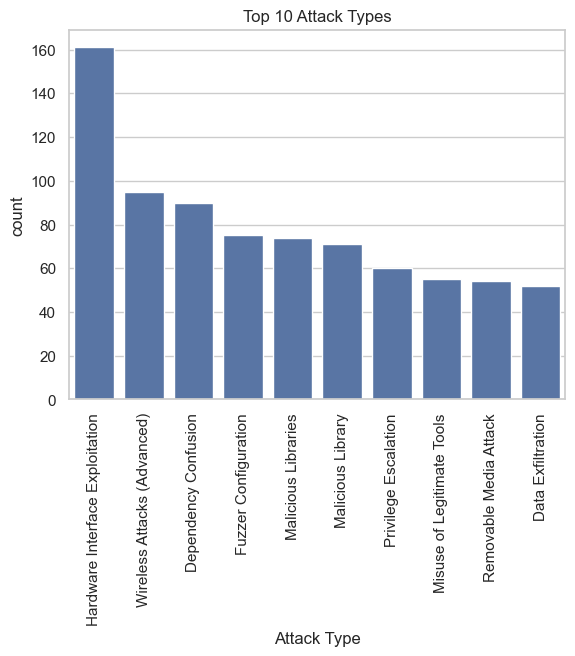

In [45]:
# Label distribution / Distribución de etiquetas
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().head(10).index)
plt.title("Top 10 Attack Types")
plt.xticks(rotation=90)
plt.show()

In [48]:
df['Category'].value_counts()  # Check unique values in 'Category'

Category
Insider Threat                                           560
Physical / Hardware Attacks                              543
Quantum Cryptography & Post-Quantum Threats              541
Malware & Threat                                         526
Wireless Attacks (Advanced)                              514
                                                        ... 
Automotive / CPS → Sensor Spoofing                         7
Automotive / CPS → Firmware Over-The-Air (FOTA) Abuse      5
Automotive / CPS → Physical Layer Attack                   3
Network security                                           2
 Mobile Security                                           1
Name: count, Length: 64, dtype: int64

In [51]:
# Gráfica 3: Category vs. Attack Type

# EN: Count how many times each (Category, Attack Type) pair appears
# ES: Contar cuántas veces aparece cada par (Categoría, Tipo de Ataque)
cat_attack_counts = df.groupby(['Category', 'Attack Type']).size().reset_index(name='Count')
print(cat_attack_counts)



                                               Category  \
0                                       Mobile Security   
1                              AI Agents & LLM Exploits   
2                              AI Agents & LLM Exploits   
3                              AI Agents & LLM Exploits   
4                              AI Agents & LLM Exploits   
...                                                 ...   
9118  Zero-Day Research / Fuzzing → Vulnerability Cl...   
9119  Zero-Day Research / Fuzzing → Vulnerability Cl...   
9120  Zero-Day Research / Fuzzing → Vulnerability Cl...   
9121  Zero-Day Research / Fuzzing → Vulnerability Cl...   
9122  Zero-Day Research / Fuzzing → Vulnerability Cl...   

                                           Attack Type  Count  
0                                 SQL Injection (SQLi)      1  
1                ARP Cache Poisoning + Packet Sniffing      1  
2                              ARP Spoofing + Sniffing      1  
3     Abuse of Rate Limiting / Acce

In [53]:

# EN: Show top 10 most frequent combinations
# ES: Mostrar las 10 combinaciones más frecuentes
top_combinations = cat_attack_counts.sort_values('Count', ascending=False).head(10)
top_combinations


,Category,Attack Type,Count
6346,Physical / Hardware Attacks,Hardware Interface Exploitation,161
6834,Quantum Cryptography & Post-Quantum Threats,Wireless Attacks (Advanced),95
7679,Supply Chain Attacks,Dependency Confusion,77
8886,Zero-Day Research / Fuzzing,Fuzzer Configuration,75
7741,Supply Chain Attacks,Malicious Library,71
7740,Supply Chain Attacks,Malicious Libraries,65
4410,Insider Threat,Misuse of Legitimate Tools,55
6451,Physical / Hardware Attacks,Removable Media Attack,54
4596,IoT / Embedded Devices,Default Credentials Exploitation,50
2261,Blue Team,Registry & Prefetch Analysis,50


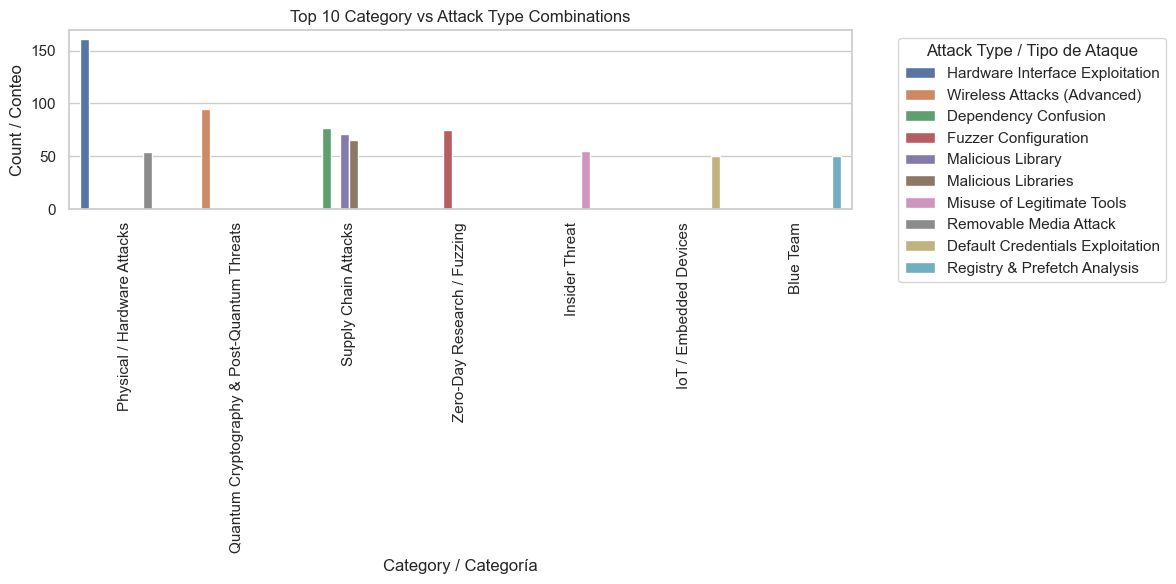

In [55]:

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_combinations, x='Category', y='Count', hue='Attack Type')
plt.title('Top 10 Category vs Attack Type Combinations')
plt.xlabel('Category / Categoría')
plt.ylabel('Count / Conteo')
plt.xticks(rotation=90)
plt.legend(title='Attack Type / Tipo de Ataque', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [58]:
# Gráfica 4: Tools Used (herramientas)

# Clean: Split values where multiple tools are in one cell
# EN: Convert comma-separated tools into a list per row
# ES: Convertir herramientas separadas por coma en una lista por fila
df_tools = df['Tools Used'].dropna().str.split(', ')
df_tools.head()

0                        [Browser, Burp Suite, SQLMap]
1    [SQLMap, Burp Suite, Havij, Browser Developer ...
2    [SQLMap, Burp Suite, Manual Browser Testing, H...
3    [SQLMap, Burp Suite, sqlninja, Manual Browser ...
4    [Burp Suite, SQLMap, Postman, Browser Dev Tool...
Name: Tools Used, dtype: object

In [62]:

# EN: Flatten list and clean whitespaces
# ES: Aplanar la lista y limpiar espacios
all_tools = [tool.strip() for sublist in df_tools for tool in sublist]

In [64]:

# EN: Count most used tools
# ES: Contar herramientas más utilizadas
tools_df = pd.Series(all_tools).value_counts().head(10).reset_index()
tools_df.columns = ['Tool', 'Count']
tools_df

,Tool,Count
0,Burp Suite,1114
1,Wireshark,704
2,Python,504
3,curl,478
4,Postman,288
5,PowerShell,262
6,bash,249
7,Scapy,233
8,Browser,192
9,PyTorch,190


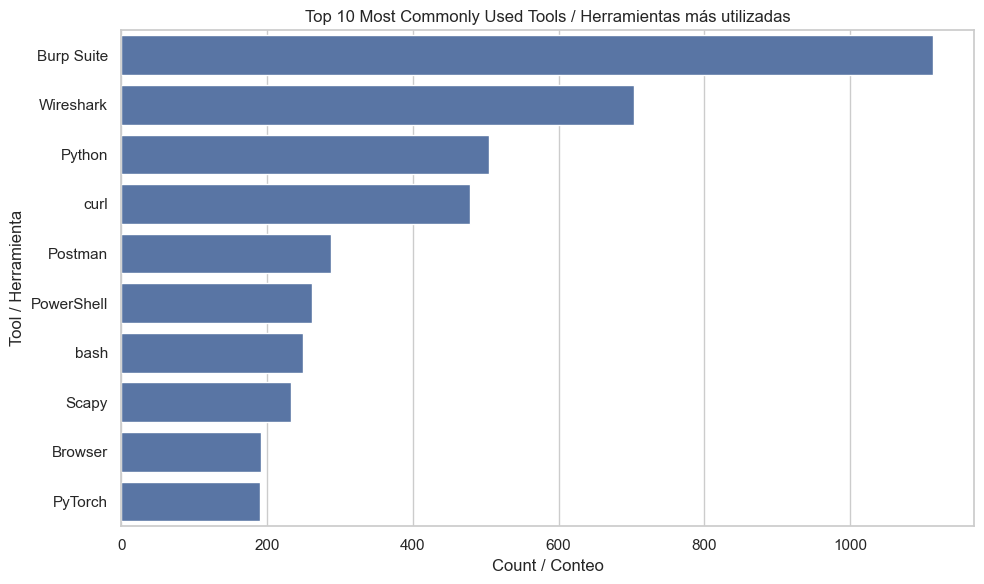

In [65]:

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tools_df, x='Count', y='Tool')
plt.title('Top 10 Most Commonly Used Tools / Herramientas más utilizadas')
plt.xlabel('Count / Conteo')
plt.ylabel('Tool / Herramienta')
plt.tight_layout()
plt.show()
